In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('lena.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 4)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('lena2.jpg', quant)
plt.imshow(image)

cv2.imread('lena.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

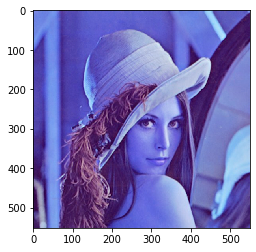

In [27]:
plt.imshow(image)

<h2 style='color:BLUE'> Interprétation </h2>

<h3 style='color:RED'> observation générale </h3>
De manière générale, l'algorithme donne un bon résultat mais présente cependant deux inconvénients :<br>
<li>d’une part, il nécessite le choix préalable du nombre K de clusters, ce qui rend impossible l’automatisation de la méthode<br></li>
<li>d’autre part, il requière un temps de calcul souvent élevé( k=30 convergence lent), du fait de leur nature itérative. </li>

<h3 style='color:red'>Effet de nombre de cluster sur la segmentatation</h3>
<li>Lorsque j'augmente le nombre de cluster je me rapproche de l'image initial.</li>
<li>plus on augmente le nombre de cluster plus on obtient des nuances de couleurs</li>



In [22]:
!pip install opencv-python

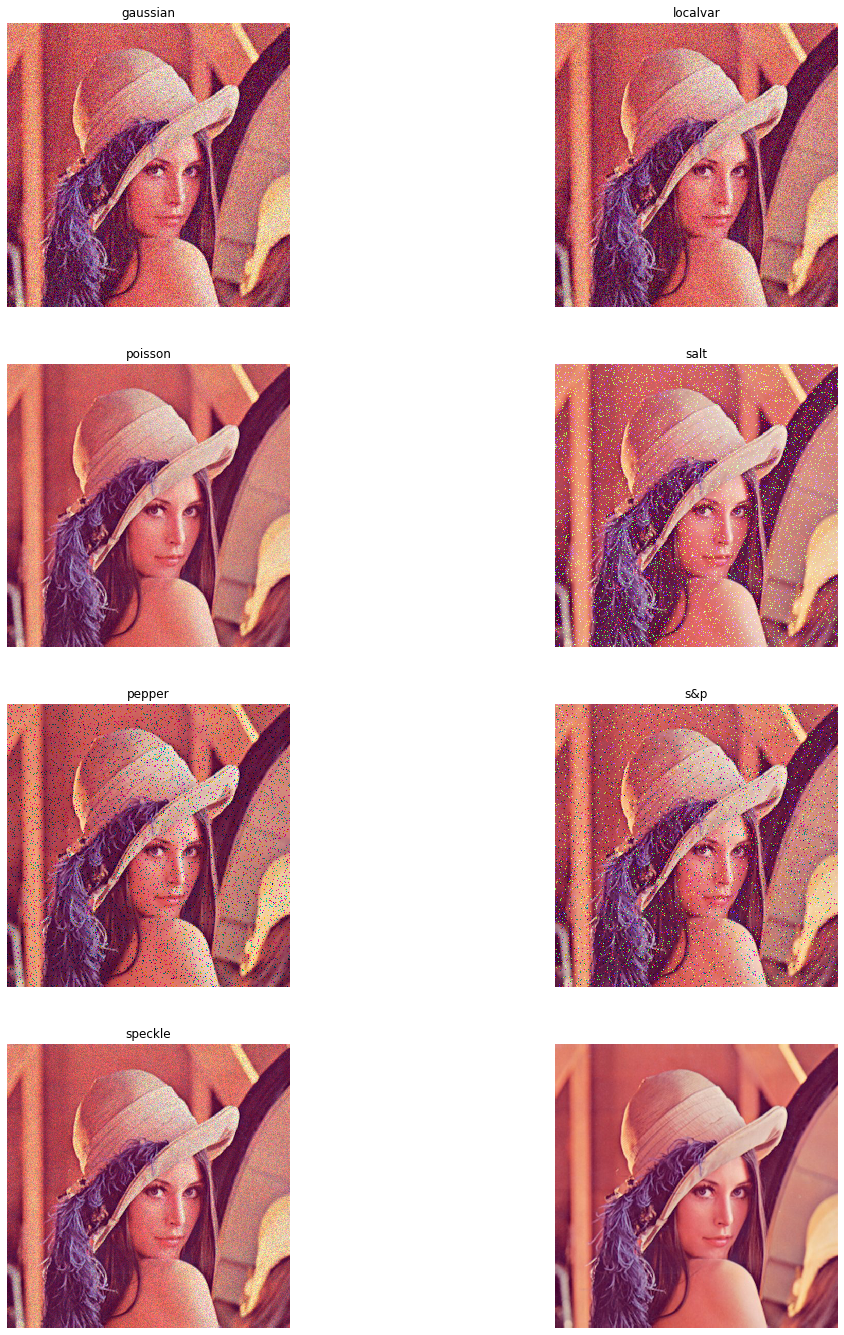

In [3]:
import skimage.io
import matplotlib.pyplot as plt
img_path="lena.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


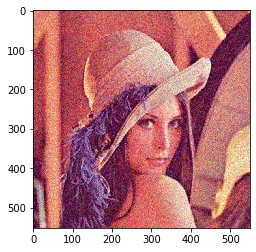

In [17]:
import skimage.data
from skimage import img_as_float
from skimage.restoration import denoise_wavelet, cycle_spin
img_path="lena.jpg"
img = skimage.io.imread(img_path)/255.0
img1 = img_as_float(img)
sigma = 0.1
img1 = img1 + sigma * np.random.standard_normal(img1.shape)
plt.imshow(img1)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


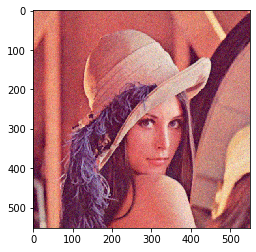

In [18]:
denoised = cycle_spin(img1, func=denoise_wavelet,
                      max_shifts=3) 
plt.imshow(denoised)